<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Aavash Subedi<br>

University of Manchester  
February 2022

We first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

We begin by importing the data from the CSV files located within the local directory. Please change the file paths by altering DIR_FILE.

*Personal Comment: I have also slightly altered the variable names of the original data and left it below if you do not wish to read the data from the file.*

In [2]:
DIR_FILE_1 = '/home/aavash/Documents/computational_physics/ExperimentalData/experimental_run1.txt'
DIR_FILE_2 = '/home/aavash/Documents/computational_physics/ExperimentalData/experimental_run2.txt'
DIR_FILE_3 = '/home/aavash/Documents/computational_physics/ExperimentalData/experimental_run3.txt'

DELIMITER = "\t"

def read_file(file_path: string, delimiter_used: string):
    """
    Parses  a text file from a given directory and outputs a Pandas array.
    
    Parameters
    ---------
    file_path: string
        Path of the file.
    delimiter_used: string
        The delimiter used within the file.

    Returns
    ---------
    Pandas array.
    
    """


    return(pd.read_csv(file_path, sep=delimiter_used, header=0))


for file_number in range(1, 4):
    exec(f'file{file_number} = np.array(read_file(DIR_FILE_{file_number}, DELIMITER))')

#Check to see if all the time values are actually valid
if file1[:,0].all() == file2[:,0].all() == file3[:,0].all():
    print("There are no missing time entries within the dataset.")
    print("\nGenerating new coloumn to store the time information.")


There are no missing time entries within the dataset.

Generating new coloumn to store the time information.


After importing all the dataset and enusuring that all time information is present, we store the time information in a seperate variable for easier access.
Similarly, the radius data is also stored in seperate arrays for ease of access.

In [3]:
time = np.array(file1[:,0])
for i in range(1, 4):
    exec(f'radius{i} = file{i}[:,1]')



P.S. For ease of marking, I have left the original data within the notebook. It is left within comments to prevent accidently running it.
I have also changed the variable names to the appropriate names that would allow the program to run.

In [176]:
 
# # experiment 1
# radius1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# # experiment 2
# radius2= np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# # experiment 3
# radius3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# # time
# time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's first calculate the uncertainity in each measurement.
We take the three diffrent measurements of radius at a given time and then
use it to calcualte the uncertainity.



In [4]:
#Uncertainity is taken as the standard deviation of the three points, errors are assumed to be distributed normally.
uncertainity = np.std((radius1, radius2, radius3), axis=0)


Let's plot this data to see what it looks like:

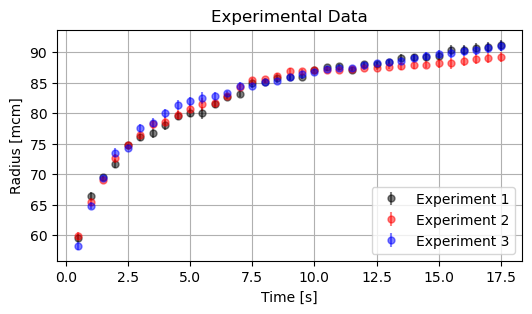

In [5]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
plt.errorbar(time, radius1, yerr=uncertainity,  fmt="ko", markersize=5, alpha=0.5)
plt.errorbar(time, radius2, yerr=uncertainity,  fmt="ro", markersize=5, alpha=0.5)
plt.errorbar(time, radius3, yerr=uncertainity,  fmt="bo", markersize=5, alpha=0.5)
plt.legend(["Experiment 1", "Experiment 2", "Experiment 3"])

# setting axis labels & figures 
plt.xlabel("Time [s]")
plt.ylabel("Radius [mcm]")
plt.title("Experimental Data")
plt.grid()


# displaying the plot
plt.show()

Errors are calculated, as the standard deviation of the three indivual measurements. These error bars are too small to be seen on the plot.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

In [6]:
# write your code here
VOLUME: float = 7.6e-15

def find_height(radius: float, vol: float = VOLUME) -> float:
    """th
    Height of the drop is found by the formula given above.
    """
    height = np.roots([np.pi/6, 0, (np.pi/2)*radius**2, -vol])
    return float(np.abs((height[~np.iscomplex(height)])))

def find_contact_angle(radius:[float]) -> [float]:
    """
    Contact angle is found by using the formula given above.
    """
    angles= np.array([])
    for radius_temp in radius:
        height = find_height(radius_temp)
        angles = np.hstack((angles, ( np.pi/2 - np.arctan((radius_temp**2- height**2)/(2*height*radius_temp)))))
    return angles

def calculate_derivative(radius_data: float, time_info: float = time) -> [list]:
    """
    Calculate the speed by taking the ratio of change in radius vs time.
    """
    derivative = np.diff(radius_data)/np.diff(time_info)
    return derivative


for i in range(1, 4):
    #We convert the radius to SI units.
    exec(f'radius{i} = radius{i}*10**-6')

    exec(f'contact_angles{i} = find_contact_angle(radius{i})')
    exec(f'speed_store{i} = calculate_derivative(radius{i})')



Let's plot these results to see what they look like:

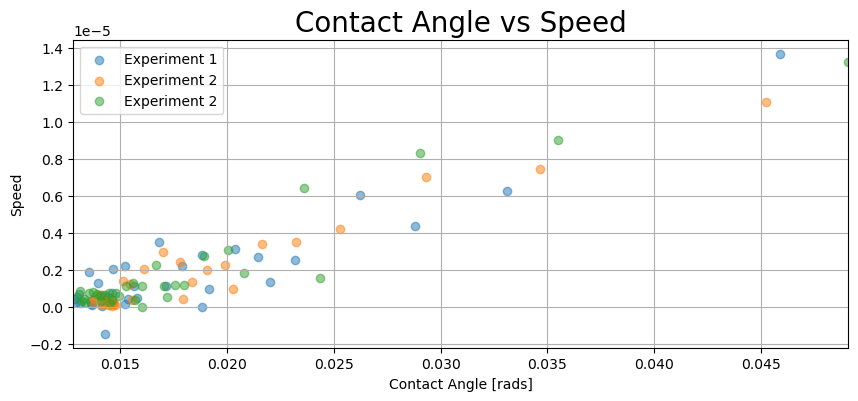

In [7]:
plt.rcParams["figure.figsize"] = (10, 4)

for i in range(1, 4):
    exec(f'plt.scatter(contact_angles{i}[:-1], speed_store{i}, alpha=0.5)');

plt.grid()
plt.xlim(left=np.amin((contact_angles1, contact_angles2, contact_angles3)), right=np.amax((contact_angles1, contact_angles2, contact_angles3)))
plt.xlabel("Contact Angle [rads]", fontsize=10)
plt.ylabel("Speed", fontsize=10)
plt.title("Contact Angle vs Speed", fontsize=20)
plt.legend(["Experiment 1", "Experiment 2", "Experiment 2"])
plt.show()

From the dataset that we can see there is a negative speed, this could be an outlier or error in the measurement. There is a possibility

The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

First, we take the mean of indiviual data points,  the standard deviation is also calculated for the three data points provided by assuiming that the uncertainity follows a Gaussian disribution.

In [9]:
def data_analysis(data: [float]) -> [[float], [float]]:
    """
    Mean and standard deviations of diffrent points in an array are calculated.
    """
    mean = np.mean((data), axis=0)
    uncertainty = np.std(data, axis=0) 
    return mean, uncertainty

avg_speed = data_analysis((speed_store1, speed_store2, speed_store3))
avg_contact_angle = data_analysis((contact_angles1, contact_angles2, contact_angles3))

#Storing the data in a sperate array, note the slicing.
#Slicing is done as there is n-1 data points for the contact speed.
master_data_store = np.vstack((np.vstack((avg_contact_angle[0][0:len(avg_speed[0])],
                     avg_speed[0][0:len(avg_speed[0])])), avg_speed[1][0:len(avg_speed[0])]))


The average contact angle versus the speed of droplets are outputted below using a line graph. The uncertainity in the mean contact speed is also displayed.

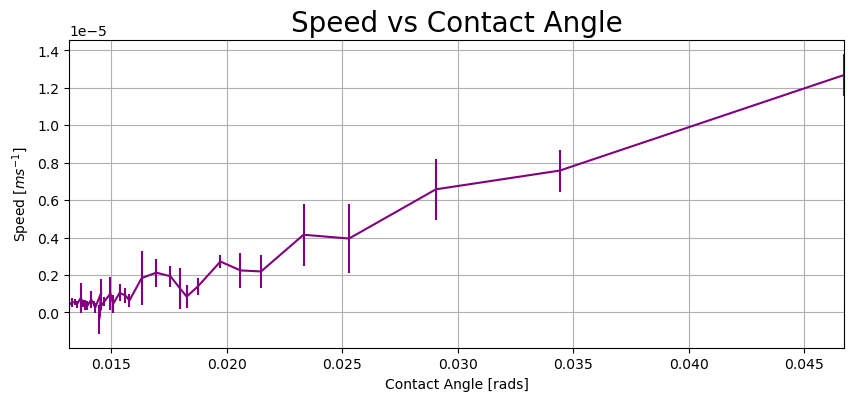

In [10]:
plt.grid()
plt.xlim(left=np.amin(master_data_store[0]), right=np.amax(master_data_store))
plt.xlabel("Contact Angle [rads]", fontsize=10)
plt.ylabel("Speed [$ms^{-1}$]", fontsize=10)
plt.title("Speed vs Contact Angle", fontsize=20)

#Plot
plt.errorbar(master_data_store[0],
 master_data_store[1], master_data_store[2], c='purple');

![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

Cure-fit attempts to find the true parameters $\hat{\theta}$ that corresponds to maximising the likelihood of the function given the observed data. One way to improve the values of the estimation of the parameters is through the aquisition of more data. The reasoning behind is that the maximum likelihood minimises the large sample approximation of the Kullback-Liebler divergence between the candidate model and the true model.

An ideal case would be when $D_{KL}$ = 0 between the candidate and the true model, this consequentially corresponds to a $\chi^{2}_{red}$ of 0.

In [11]:

def cox_voinox(angle: float, U_0: float, angle_0: float) -> float:
    """
    Equation that follows the Cox-Voinov law.
    """
    return U_0 * (np.power(angle, 3) - angle_0**3)

def de_gennes(angle: float, U_0: float, angle_0: float) -> float:
    """
    Equation that follows the de Genees law.
    """
    return U_0 * (np.power(angle, 2) - angle_0**2)

def fit_data(function, data: [list], initial_guess ) -> [list]:
    """
    Fits the data using curve fit. 
    """
    
    popt, pcov = curve_fit(function, data[0], data[1], sigma=data[2], 
    p0=initial_guess)
    return popt, pcov

cox_voinox_param, cox_voinox_covariance = fit_data(cox_voinox, master_data_store, [0.0675, 1] )
gennes_param, gennes_covariance = fit_data(de_gennes, master_data_store, [0.0675, 10])
print(f'The value of the first paramater obtained from Cox-Vonix law is '
    f'{cox_voinox_param[0]:.3} +/- {np.sqrt(cox_voinox_covariance[0][0]):.2} degrees.')
print(f'The value of the second paramater obtained from Cox-Vonix law is '
    f'{cox_voinox_param[1]:.3} +/- {np.sqrt(cox_voinox_covariance[1][1]):.2} degrees.')

print(f'The value of the first paramater obtained from de Gennes law is '
    f'{gennes_param[0]:.3} +/- {np.sqrt(gennes_covariance[0][0]):.2} degrees.')
print(f'The value of the second paramater obtained from de Gennes law is '
    f'{gennes_param[1]:.3} +/- {np.sqrt(gennes_covariance[1][1]):.2} degrees.')


The value of the first paramater obtained from Cox-Vonix law is 0.145 +/- 0.012 degrees.
The value of the second paramater obtained from Cox-Vonix law is -0.00996 +/- 0.0019 degrees.
The value of the first paramater obtained from de Gennes law is 0.00676 +/- 0.00039 degrees.
The value of the second paramater obtained from de Gennes law is 0.011 +/- 0.00039 degrees.


Displaying the corresponding fits  

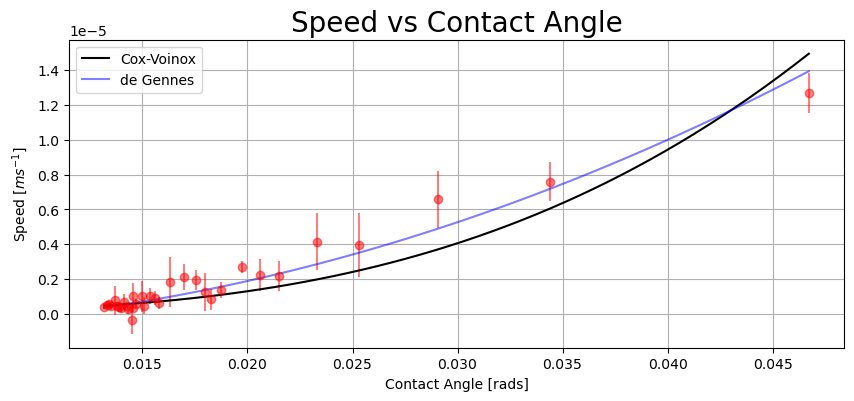

In [12]:
min = np.amin(master_data_store[0])
max = np.amax(master_data_store[0])
plt.plot(np.linspace(min, max, 50),
 cox_voinox(np.linspace(min, max, 50), cox_voinox_param[0], cox_voinox_param[1]),
 color="black")
plt.plot(np.linspace(min, max, 50),
 de_gennes(np.linspace(min,max, 50), gennes_param[0], gennes_param[1]), color="blue", alpha=0.5)
plt.grid()
plt.errorbar(master_data_store[0], master_data_store[1],
 yerr=master_data_store[2], fmt="ro", alpha=0.5);
plt.xlabel("Contact Angle [rads]", fontsize=10)
plt.ylabel("Speed [$ms^{-1}$]", fontsize=10)
plt.title("Speed vs Contact Angle", fontsize=20)
plt.legend(["Cox-Voinox", "de Gennes"])
plt.show()
  

It is intresting to note the sparsitiy of data points at greater contact angles compared to between 0 to 0.015 radians. Zooming in further within this region yields a plot of.

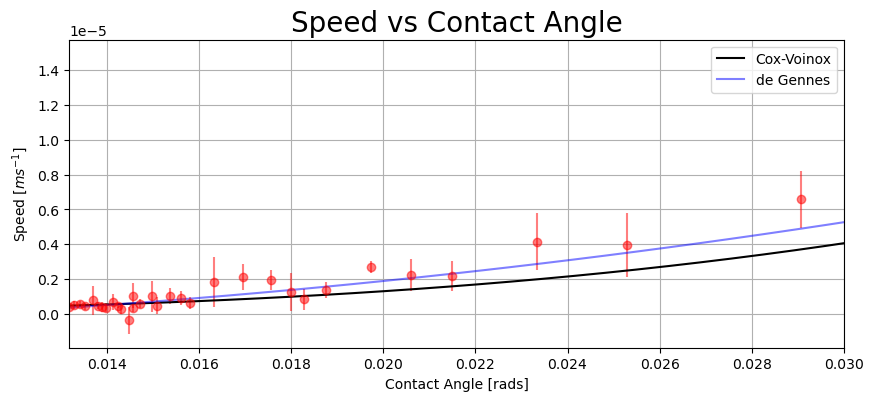

In [13]:
min = np.amin(master_data_store[0])
max = np.amax(master_data_store[0])
plt.plot(np.linspace(min, max, 50),
 cox_voinox(np.linspace(min, max, 50), cox_voinox_param[0], cox_voinox_param[1]),
 color="black")
plt.plot(np.linspace(min, max, 50),
 de_gennes(np.linspace(min,max, 50), gennes_param[0], gennes_param[1]), color="blue", alpha=0.5)
plt.grid()
plt.errorbar(master_data_store[0], master_data_store[1],
 yerr=master_data_store[2], fmt="ro", alpha=0.5);
plt.xlabel("Contact Angle [rads]", fontsize=10)
plt.ylabel("Speed [$ms^{-1}$]", fontsize=10)
plt.title("Speed vs Contact Angle", fontsize=20)
plt.legend(["Cox-Voinox", "de Gennes"])

plt.xlim(right=0.03, left=min)
plt.show()

Within this region a linear trend is observed, if we zoom in further by setting the right limit of the x-axis to 0.015 we notice that the trend is entirely linear with a gradient of approximately 0.

Therefore, to improve our understanding of the model, it would be wiser to obtain more data points. Alternatively, if the true model is known, more data could be generated.

![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

In [14]:
def reduced_chi_squared(data: [float], func, U_0: float, angle_0: float, fitting_params: int) -> float:
    """
    Calculates reduced chi-squared for a function.
    """
    x_vals, observation, observation_uncertainty = data

    prediction = func( x_vals, U_0, angle_0)
    
    return np.sum((observation - prediction)**2 / observation_uncertainty**2)/(len(x_vals) - fitting_params) 

In [15]:
print(f' The reduced chi-squared of Cox-Voinox law is '
 f'{reduced_chi_squared(master_data_store, cox_voinox, cox_voinox_param[0], cox_voinox_param[1], 2):.3f}.')

print(f' The reduced chi-squared of de Gennes law is ' 
 f'{reduced_chi_squared(master_data_store, de_gennes, gennes_param[0], gennes_param[1], 2):.3f}.')

 The reduced chi-squared of Cox-Voinox law is 1.430.
 The reduced chi-squared of de Gennes law is 0.747.


#### Plot of Residuals

In [20]:
def residual_plot(y_pred: float, y_true: float, y_unc: float):
    """
    Plots the residuals for data.
    """
    plt.grid()
    plt.hlines(0,0, np.amax((y_true, y_pred)))
    plt.xlim(0, np.amax((y_true, y_pred)))
    plt.xlabel("Contact Angle [rads]", fontsize=10)
    plt.ylabel("Residuals", fontsize=10)
    plt.title("Residuals vs Contact Angle", fontsize=20)
    return plt.errorbar(y_pred, (y_pred-y_true),  yerr=y_unc,
     fmt="ro", alpha=0.2)

Residual plot for Cox-Voinox Law.

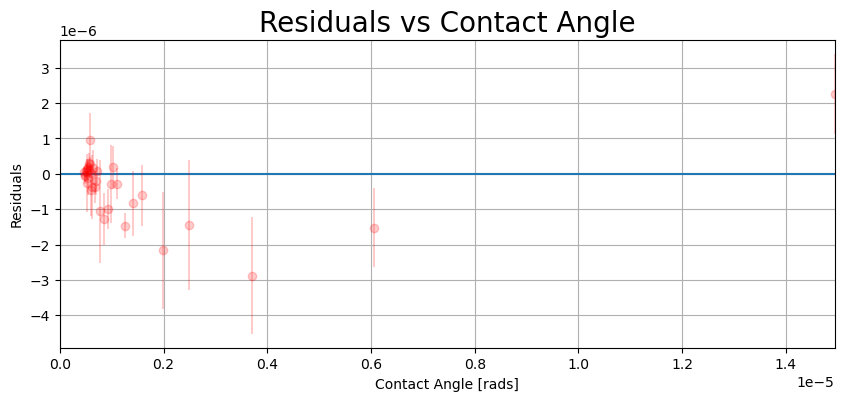

In [21]:
residual_plot(cox_voinox(master_data_store[0], cox_voinox_param[0],
cox_voinox_param[1]), master_data_store[1], master_data_store[2]);

Residual plot for de Gennes law.

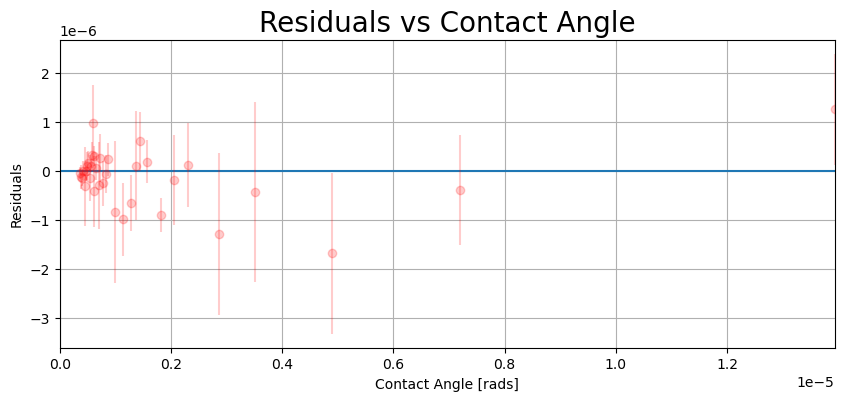

In [22]:
residual_plot(de_gennes(master_data_store[0], gennes_param[0],
gennes_param[1]), master_data_store[1], master_data_store[2]);

![](./img/bee.png)
## Drop Spreading Law Is

First, we note that the reduced chi squared of the de Gennes law is lower. This suggests, given the dataset that we have, the model presented by the de Gennes law, $\bar{F}$ is a better approximate to the true model $F$. 
This is a direct result of minimising the KL divergence between $\bar{F}$ and $F$. 

This means that de Gennes law is a better fit for the behaviour of the spreading of the drop. Inspecting the residuals also leads to the same conclusion as visually all the error bars of indivual points lie within the line of 0 residual.

![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 

It would be intresting to see what a model trained based on supervisied machine learning techniques would predict for a radius given a time. The volume of the droplet would be held constant at 7.6pL or normalised to 1. Comparisions could be made between the predicted model and a machine learning model.

Although it is impossible to do this task given SKLearn/Keras/Pytorch does not come preinstalled within the Anaconda distribution, I will instead outline how the task could be done.

1) Data Collection - More data would improve the model, however we can still make predictions and inference from the data at hand.
2) Exploratory Data Analysis - Akin to the data analysis that is done throughout the project, a more extensive data investigation and cleaning process needs to be taken.
3) Model selection - As we are mostly intrested in regression, a simple Random Forest Regressor could be ultilised. 
4) Upon model selection, training the model with the criterion of M.S.E and the adam optimiser would lead to the desired results. (Tested within another jupyter notebook that supports the SKLearn environment)
5) Model prediction and inference.
6) Comparision between a machine learning model and the model presented within the project could be tested.

*Personal thought: I highly suspect the model itself would overfit given the very limited availability of data. However, it would still be a fun exercise to compare how the model could predict the radius at a given time for future measurements!*



**Credits: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html**

#### Increasing the polynomial order.

It will be intresting to check what the effect of increasing the polynomial order would be to model the data.

In [23]:
def fourth_order_polynomail(angle: float, U_0: float, angle_0: float) -> float:
    """
    Equation that checks fourth order polynomial.
    """
    return U_0 * (np.power(angle, 4) - angle_0**4)

In [24]:
fourth_param, fourth_covariance = fit_data(fourth_order_polynomail
, master_data_store, [0.0675, 0.01])

print(f'The value of the first paramater obtained from de Gennes law is '
    f'{fourth_param[0]:.3} +/- {np.sqrt(fourth_covariance[0][0]):.2} degrees.')
print(f'The value of the second paramater obtained from de Gennes law is '
    f'{fourth_param[1]:.3} +/- {np.sqrt(fourth_covariance[1][1]):.2} degrees.')

The value of the first paramater obtained from de Gennes law is 3.49 +/- 0.48 degrees.
The value of the second paramater obtained from de Gennes law is -3.74e-05 +/- 3.2e+03 degrees.


Now, we want to investigate the effect of using a linear model.

In [25]:
def linear(angle: float, U_0: float, angle_0: float) -> float:
    """
    Equation that checks linear model.
    """
    return U_0 * (angle- angle_0)
linear_param, linear_covariance = fit_data(fourth_order_polynomail
, master_data_store, [0.0675, 0.01])

print(f'The value of the first paramater obtained from de Gennes law is '
    f'{linear_param[0]:.3} +/- {np.sqrt(linear_covariance[0][0]):.2} degrees.')
print(f'The value of the second paramater obtained from de Gennes law is '
    f'{linear_param[1]:.3} +/- {np.sqrt(linear_covariance[1][1]):.2} degrees.')

The value of the first paramater obtained from de Gennes law is 3.49 +/- 0.48 degrees.
The value of the second paramater obtained from de Gennes law is -3.74e-05 +/- 3.2e+03 degrees.


In [26]:
print(f' The reduced chi-squared of quartic function is '
 f'{reduced_chi_squared(master_data_store, fourth_order_polynomail, fourth_param[0], fourth_param[1], 2):.3f}.')

print(f' The reduced chi-squared of the linear function is ' 
 f'{reduced_chi_squared(master_data_store, linear, linear_param[0], linear_param[1], 2):.3f}.')

 The reduced chi-squared of quartic function is 4.499.
 The reduced chi-squared of the linear function is 30811335118.279.


Clearly these models dont fit the data as well as the previous models due to the reduced chi-squared of these models being higher than both of the other models.